In [1]:
import numpy as np
import torch

import matplotlib.pyplot as plt
%matplotlib inline

from utils.datasets import get_data, BatchSlidingWindow

/home/coffeetumbler/anaconda3/envs/ano_trans/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# SMAP dataset
(train_smap, _), (test_smap, test_label_smap) = get_data('SMAP')

load data of: SMAP
train:  0 None
test:  0 None
Data normalized
Data normalized
train set shape:  (135183, 25)
test set shape:  (427617, 25)
test set label shape:  (427617,)


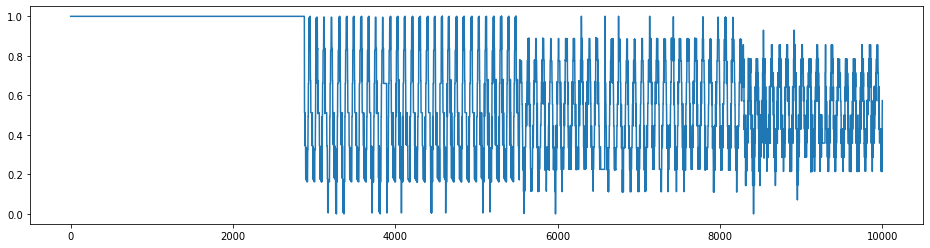

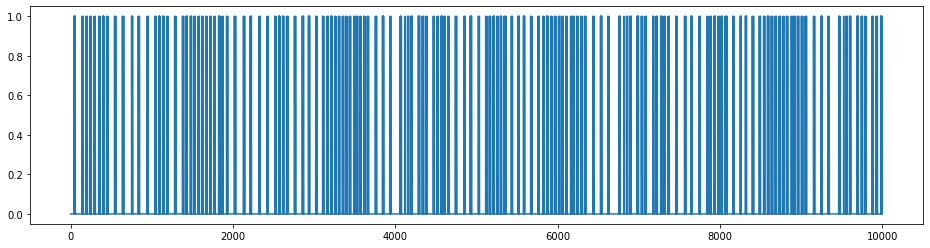

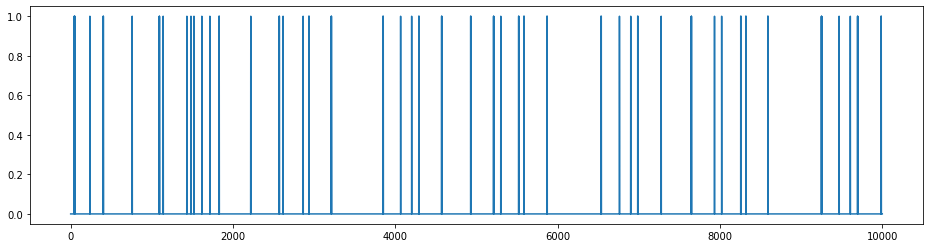

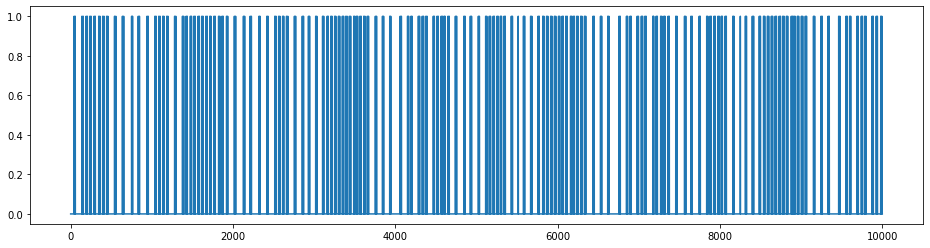

In [8]:
# Show data example. - train
plt.figure(figsize=(16, 4))
plt.plot(train_smap[:10000, 0])
plt.show()

plt.figure(figsize=(16, 4))
plt.plot(train_smap[:10000, 1])
plt.show()

plt.figure(figsize=(16, 4))
plt.plot(train_smap[:10000, 2])
plt.show()

plt.figure(figsize=(16, 4))
plt.plot(train_smap[:10000, 3])
plt.show()

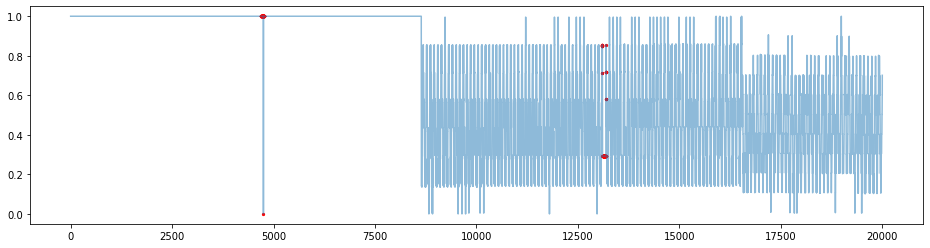

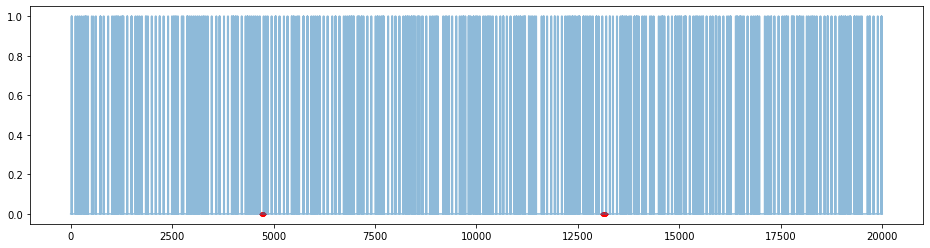

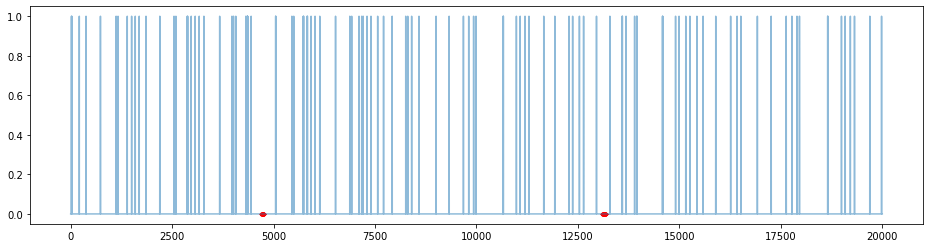

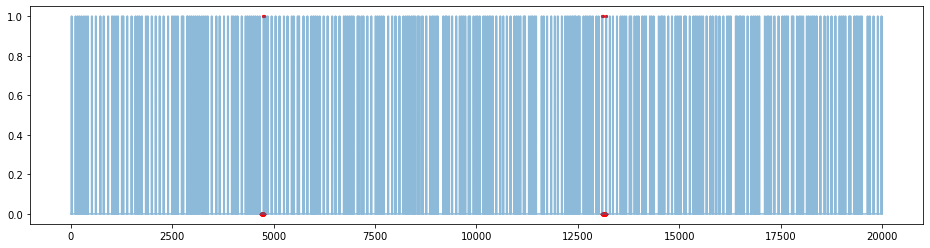

In [28]:
# Show data example. - test
anomaly_args = np.argwhere(test_label_smap).flatten()
length = 20000

plt.figure(figsize=(16, 4))
plt.plot(test_smap[:length, 0], alpha=0.5)
plt.scatter(anomaly_args[anomaly_args < length], test_smap[anomaly_args[anomaly_args < length], 0], color='red', s=5)
plt.show()

plt.figure(figsize=(16, 4))
plt.plot(test_smap[:length, 1], alpha=0.5)
plt.scatter(anomaly_args[anomaly_args < length], test_smap[anomaly_args[anomaly_args < length], 2], color='red', s=5)
plt.show()

plt.figure(figsize=(16, 4))
plt.plot(test_smap[:length, 2], alpha=0.5)
plt.scatter(anomaly_args[anomaly_args < length], test_smap[anomaly_args[anomaly_args < length], 2], color='red', s=5)
plt.show()

plt.figure(figsize=(16, 4))
plt.plot(test_smap[:length, 3], alpha=0.5)
plt.scatter(anomaly_args[anomaly_args < length], test_smap[anomaly_args[anomaly_args < length], 3], color='red', s=5)
plt.show()

In [18]:
# Show data example. - test label
print(len(test_label_smap[test_label_smap]))
np.argwhere(test_label_smap[:10000]).flatten()

54696


array([4690, 4691, 4692, 4693, 4694, 4695, 4696, 4697, 4698, 4699, 4700,
       4701, 4702, 4703, 4704, 4705, 4706, 4707, 4708, 4709, 4710, 4711,
       4712, 4713, 4714, 4715, 4716, 4717, 4718, 4719, 4720, 4721, 4722,
       4723, 4724, 4725, 4726, 4727, 4728, 4729, 4730, 4731, 4732, 4733,
       4734, 4735, 4736, 4737, 4738, 4739, 4740, 4741, 4742, 4743, 4744,
       4745, 4746, 4747, 4748, 4749, 4750, 4751, 4752, 4753, 4754, 4755,
       4756, 4757, 4758, 4759, 4760, 4761, 4762, 4763, 4764, 4765, 4766,
       4767, 4768, 4769, 4770, 4771, 4772, 4773, 4774])

In [39]:
a = 1.
b = (1,0.5)
c = None
d = np.zeros(3)

print(hasattr(a, '__iter__'))
print(hasattr(b, '__iter__'))
print(hasattr(c, '__iter__'))
print(hasattr(d, '__iter__'))

False
True
False
True


In [40]:
mask_input = False if b[1] == None else True if b[1] > 0 else False
mask_input

True

In [42]:
_mask_token_rate = (0.05, 0.15)
np.random.uniform(*_mask_token_rate, 5)

array([0.12707472, 0.13936122, 0.13717792, 0.11460571, 0.0963531 ])

In [58]:
x = torch.rand(5, requires_grad=True)
z = torch.rand(5, 5, requires_grad=True)
mask = torch.zeros(5).bool()
mask[0] = True
mask[3] = True

print(x)
print(z)

tensor([0.4825, 0.0021, 0.9473, 0.9458, 0.6713], requires_grad=True)
tensor([[0.0343, 0.1182, 0.5328, 0.1985, 0.3031],
        [0.9108, 0.4704, 0.2948, 0.8758, 0.1460],
        [0.2069, 0.4166, 0.8715, 0.9289, 0.3608],
        [0.1514, 0.7143, 0.3161, 0.5536, 0.5288],
        [0.5535, 0.5091, 0.4799, 0.8054, 0.9719]], requires_grad=True)


In [59]:
y = torch.matmul(z, x)
y = y.masked_fill(mask, 0)
print(y)

tensor([0.0000, 1.6460, 2.0469, 0.0000, 2.1369], grad_fn=<MaskedFillBackward0>)


In [60]:
loss = torch.dot(y, y)
print(loss)

loss.backward()
print(x.grad)
print(z.grad)

tensor(11.4651, grad_fn=<DotBackward>)
tensor([ 6.2104,  5.4294,  6.5889, 10.1277,  6.1114])
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [1.5883, 0.0071, 3.1183, 3.1134, 2.2098],
        [1.9752, 0.0088, 3.8778, 3.8716, 2.7480],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [2.0620, 0.0092, 4.0483, 4.0419, 2.8689]])


In [61]:
z.masked_fill(mask.unsqueeze(1), 0)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.9108, 0.4704, 0.2948, 0.8758, 0.1460],
        [0.2069, 0.4166, 0.8715, 0.9289, 0.3608],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5535, 0.5091, 0.4799, 0.8054, 0.9719]],
       grad_fn=<MaskedFillBackward0>)

In [68]:
torch.matmul(mask.float().unsqueeze(1), torch.arange(0, 2.1, 0.5).unsqueeze(0))

tensor([[0.0000, 0.5000, 1.0000, 1.5000, 2.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.5000, 1.0000, 1.5000, 2.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000]])